# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
# from tensorflow.keras import Input
# from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd E:\NLP NOTEBOOKS

/content/drive/MyDrive/DLBC/Deep Learning Notebooks/Week 6


# reading data

In [3]:
data_f = pd.read_csv("E:/NLP NOTEBOOKS/clickbait_data.csv")

In [4]:
data_f.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [6]:
word_embedding = {}
file = open("E:/NLP NOTEBOOKS/glove.6B.50d.txt", encoding = "utf")
for line in file.readlines():
  words = line.split()
  word = words[0]
  values = np.array(words[1:], dtype="float32")
  word_embedding[word] = values
file.close()

print(f"Found {len(word_embedding)} word vectors.")

Found 400000 word vectors.


### separating features and labels

In [7]:
data = data_f["headline"]
label = data_f["clickbait"]

# tokenization

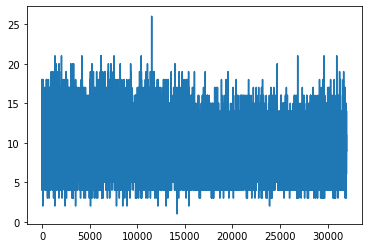

In [8]:
tok = Tokenizer()
tok.fit_on_texts(data.values)
sequences = tok.texts_to_sequences(data.values)
lengths = [len(i) for i in sequences]
sequences = sequence.pad_sequences(sequences=sequences, maxlen = 20)
plt.plot(lengths)

# splitting data

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(sequences, label, shuffle = True, random_state = 10, test_size=0.1, )

In [10]:
voc_size = len(tok.word_index)
max_words = voc_size
embedding_dim = 50
embedding_index = np.zeros((max_words, embedding_dim))
for word, index in tok.word_index.items():
  if index < max_words:
    embedding_vector = word_embedding.get(word)
    if embedding_vector is not None:
      embedding_index[index] = embedding_vector

# Building Model

In [102]:
mdl = tf.keras.models.Sequential()
mdl.add(layers.Embedding(voc_size + 1, 50, input_length=20))
mdl.add(layers.LSTM(16, activation="relu", return_sequences=True))
mdl.add(layers.LSTM(16, activation="relu"))
mdl.add(layers.Dense(16, activation = "relu"))
mdl.add(layers.Dense(1, activation = "sigmoid"))

In [103]:
mdl.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 50)            1211150   
                                                                 
 lstm_8 (LSTM)               (None, 20, 16)            4288      
                                                                 
 lstm_9 (LSTM)               (None, 16)                2112      
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,217,839
Trainable params: 1,217,839
Non-trainable params: 0
_________________________________________________________________


# compiling

In [104]:
mdl.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss = tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

# trainnig

In [105]:
model = mdl.fit(xtrain, ytrain, validation_split=0.1, epochs = 5)

Epoch 1/5
810/810 [==============================] - 33s 36ms/step - loss: 0.3717 - accuracy: 0.8780 - val_loss: 0.1034 - val_accuracy: 0.9646
Epoch 2/5
810/810 [==============================] - 29s 35ms/step - loss: 0.0790 - accuracy: 0.9726 - val_loss: 0.0761 - val_accuracy: 0.9757
Epoch 3/5
810/810 [==============================] - 30s 37ms/step - loss: 0.0477 - accuracy: 0.9835 - val_loss: 0.0711 - val_accuracy: 0.9771
Epoch 4/5
810/810 [==============================] - 29s 36ms/step - loss: 0.0333 - accuracy: 0.9886 - val_loss: 0.0805 - val_accuracy: 0.9705
Epoch 5/5
810/810 [==============================] - 32s 40ms/step - loss: 0.0194 - accuracy: 0.9944 - val_loss: 0.0724 - val_accuracy: 0.9771


# Plotting losses and Accuracy

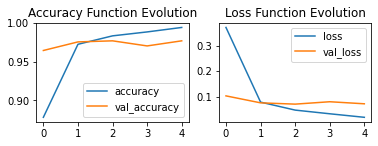

In [106]:
plt.subplot(2, 2, 1)
plt.plot(model.history['accuracy'], label='accuracy')
plt.plot(model.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(model.history['loss'], label='loss')
plt.plot(model.history['val_loss'], label='val_loss')
plt.title('Loss Function Evolution')
plt.legend()           # returns the index of maximum value

# Making predictions

In [107]:
# The Scary New Science That Shows Milk Is Bad for You ---> CB
# Can Face Masks Prevent You From Getting the Coronavirus---> CB
#  be a good version of yourself ---> NCB

sample_input = sequence.pad_sequences(tok.texts_to_sequences(["5 reasons why your are not losing your weight"]), maxlen = 20)
mdl.predict(
    [
      sample_input
    ]
)

1/1 [==============================] - 1s 1s/step


array([[0.99999803]], dtype=float32)

In [108]:
predicted = mdl.predict(xtest)

100/100 [==============================] - 2s 10ms/step


In [109]:
predicted_ = np.squeeze(predicted)
predict = list(np.zeros((len(predicted), )))
for i in range(len(predicted_)):
  if predicted_[i] >= 0.5:
    predict[i] = 1
  else:
    predict[i] = 0


In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix

pre = accuracy_score(ytest, predict)
cm = confusion_matrix(ytest, predict)

In [111]:
print("Confusion matrix is: \n", cm)
print("Model accuracy is: ", pre)

Confusion matrix is: 
 [[1559   23]
 [  40 1578]]
Model accuracy is:  0.9803125
